In [1]:
# Import packages
import pandas as pd
import numpy as np
import re

# NLP
import nltk


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:
# import pickle
# with open('df_cleaned.pickle','rb') as read_file:
#     df = pickle.load(read_file)

# Import data

In [13]:
df = pd.read_csv('/Users/alentersakyan/sf19_ds16/Metis-Project-4/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Feature descriptions

In [17]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
# Look at one row closer to get a feel for the cols
df.iloc[5].to_frame()

,5
country,Spain
description,Blackberry and raspberry aromas show a typical...
designation,Ars In Vitro
points,87
price,15
province,Northern Spain
region_1,Navarra
region_2,NaN
taster_name,Michael Schachner
title,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...


In [14]:
# Drop cols I won't use for sure
df.drop(['Unnamed: 0', 'taster_twitter_handle'], axis=1,inplace=True)

# No vintage column, need to extract from 'title' column
- Need to extract year/vintage from 'title'. Might not need this but would be nice to have

In [74]:
# Check some titles-- most have vintage in title, so I will extract from that column (this is also mentioned in kaggle dataset)
df['title'].sample(15)

128946    Errazuriz 2012 Max Reserva Pinot Noir (Aconcag...
51146           Concannon 2014 Chardonnay (Monterey County)
110070                  Baron Ermengaud 2007 Red (Faugères)
28979                       Chavet Fils 2014  Menetou-Salon
123751         Lo Nuevo 2011 Covello Albariño (Rías Baixas)
37653       Viu Manent 2005 Viu 1 Malbec (Colchagua Valley)
115511    La Rochelle 2007 Pinot Noir (Santa Cruz Mounta...
68919     Albert Bichot 2007 Domaine Long-Depaquit Les V...
85898     Dusted Valley 2007 Grenache (Columbia Valley (...
20454     Viña Albali 2011 Crianza Tempranillo (Valdepeñas)
44853               Vinihold 2016 Altimo Branco White (Dão)
119092    Dr. Loosen 2011 Ürziger Würzgarten Spätlese Ri...
1137      Cantine Grasso 2014 Nero d'Avola (Terre Sicili...
6456      Sleight of Hand 2010 The Enchantress Old Vine ...
91326            Morambro Creek 2014 Chardonnay (Padthaway)
Name: title, dtype: object

In [19]:
# Regex to extract numbers from the title text
df['vintage'] = df.title.apply(lambda x : re.findall(r'[0-9]+', x))

# Strip away extra punctuation
df['vintage'] = df['vintage'].apply(','.join)

# About 4k rows did not get vintage- seems like they are NV sparkling wines... will add NV to vintage col
#df[df.vintage == '']

df['vintage'].replace('', 'NV',inplace=True) # Replace null with NV (no vintage)
df['vintage'].replace('999', 'NV',inplace=True) # some random spot checking / fixing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country        129908 non-null object
description    129971 non-null object
designation    92506 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
region_2       50511 non-null object
taster_name    103727 non-null object
title          129971 non-null object
variety        129970 non-null object
winery         129971 non-null object
vintage        129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


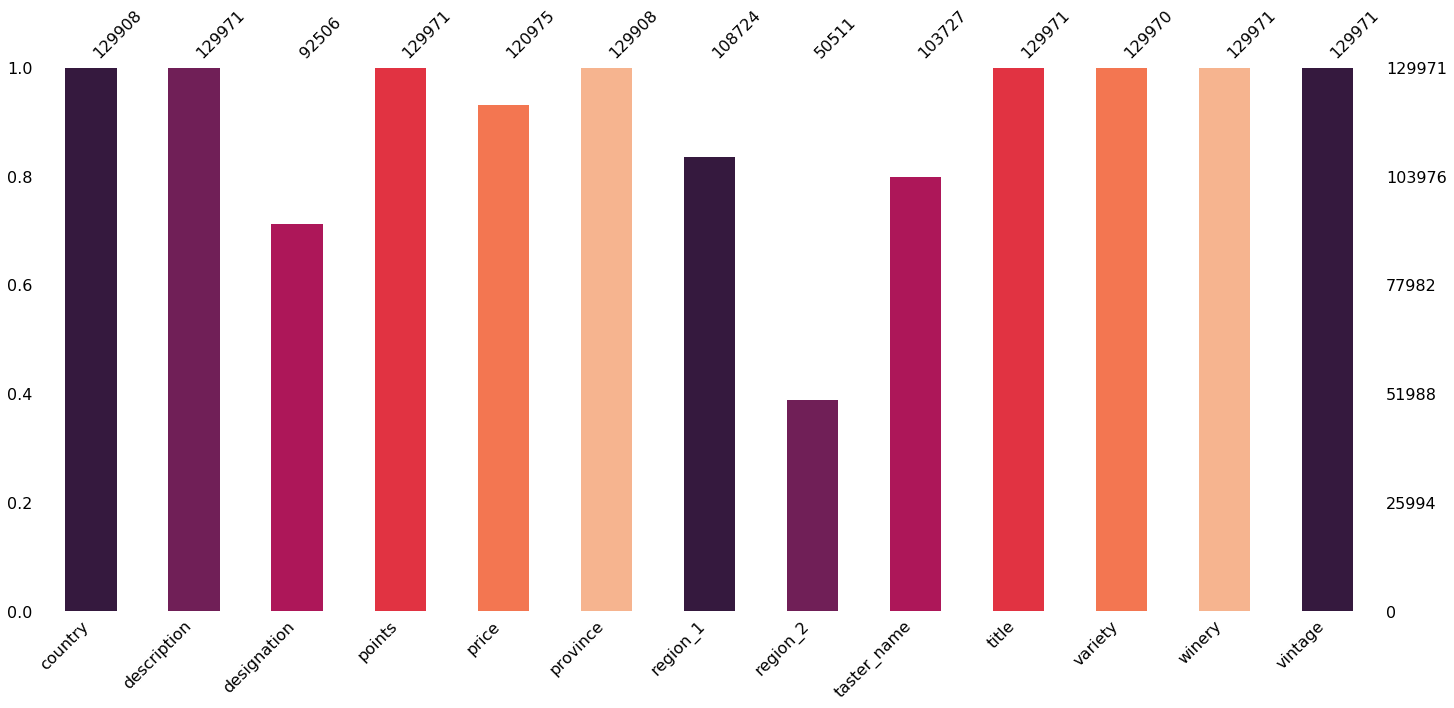

In [26]:
# Bar graph to show cols with missing data/ nulls
msno.bar(df,color= sns.color_palette('rocket'))

In [27]:
df.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# # Find duplicates across all cols (so all cols need to be exact match)
# duplicate_df = df[df.duplicated()]
# duplicate_df.shape

In [30]:
# Drop duplicate rows, ~ 9k
df.drop_duplicates(keep='first', inplace=True)

In [31]:
df.shape

(119988, 13)

In [32]:
df.reset_index().head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


# Check out numeric features: points + price

In [33]:
df.describe()
# Points only 80-100, price ranges quite a bit.

,points,price
count,119988.000000,111593.000000
mean,88.442236,35.620747
std,3.092915,42.103728
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


## Points

In [75]:
# How many wines are ultra high rated? Looks like ~ 2k
df[df.points > df.points.quantile(.95)].shape

(2392, 14)

Skew: 0.043618366349351935
Kurtosis: -0.33765721916661784


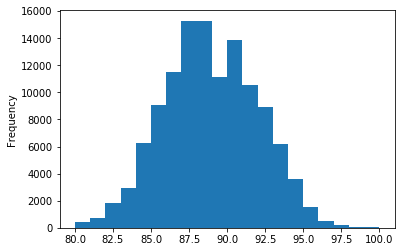

In [36]:
df.points.plot(kind='hist', bins=20)
print("Skew: {}".format(df.points.skew()))
print("Kurtosis: {}".format(df.points.kurtosis()))
# Looks normal but it's only normal between 80 - 100. Might need to log

## Price

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


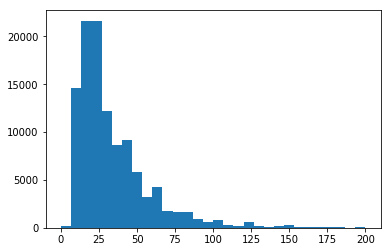

In [37]:
# Look at price hist from 0 - 200 range only
plt.hist(df.price, 30, range=[0, 200]);

### Log price, then remove outliers

In [38]:
# Log price to normalize because it's pretty skewed
df['log_price'] = np.log(df['price'])

Skew: 0.5996979620800849
Kurtosis: 0.7456580832236539


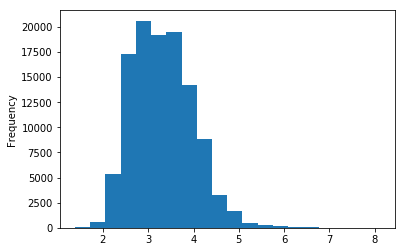

In [39]:
df['log_price'].plot(kind='hist', bins = 20)
print("Skew: {}".format(df.log_price.skew()))
print("Kurtosis: {}".format(df.log_price.kurtosis()))

In [40]:
df['log_price'].describe()

count    111593.000000
mean          3.316905
std           0.659363
min           1.386294
25%           2.833213
50%           3.218876
75%           3.737670
max           8.101678
Name: log_price, dtype: float64

In [41]:
print(df['price'].quantile(.999))
print(df['log_price'].quantile(.999))


476.0
6.16541785423142


Text(0.5, 1.0, 'Boxplot of price')

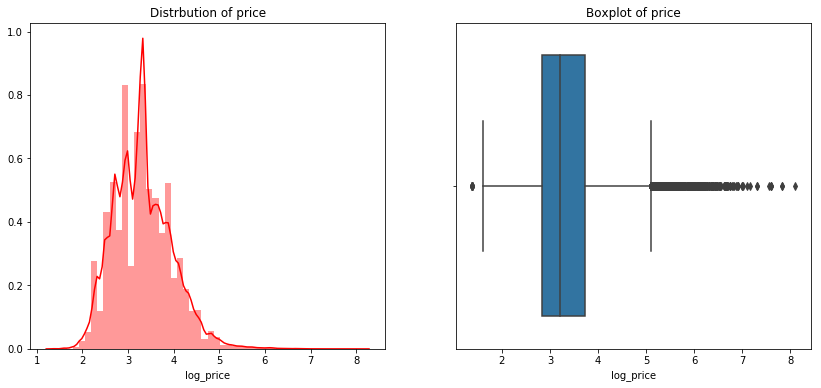

In [42]:
# Examine log_price distributions
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(df['log_price'].fillna(df['log_price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = df['log_price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

## Price (log) to point trend

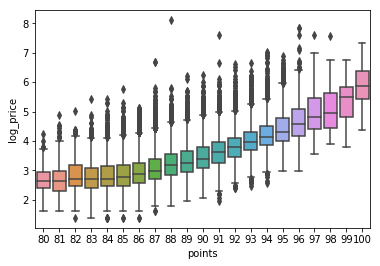

In [43]:
sns.boxplot(x = 'points', y = 'log_price', data = df);

Text(0.5, 1.0, 'Boxplot of points')

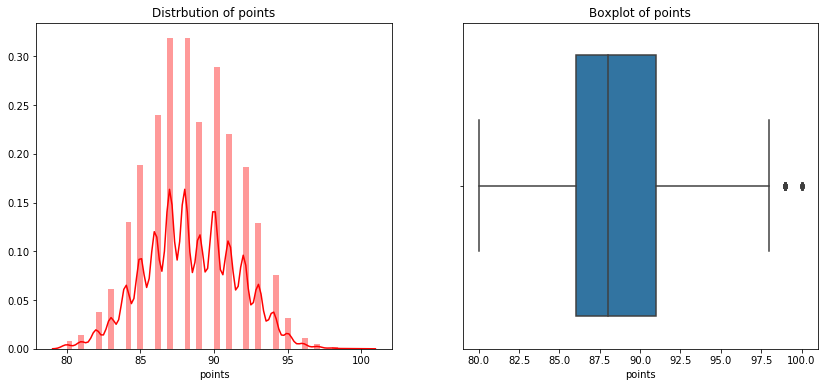

In [44]:
# Examine points distributions
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(df['points'].fillna(df['points'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of points')
sns.boxplot(x = df['points'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of points')

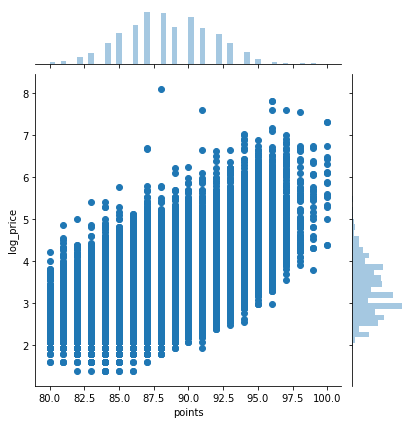

In [45]:
# Price- Points relationship
sns.jointplot( x = df['points'],y = df['log_price']);

In [46]:
print("Correlation of points with log price: {}".format(df['points'].corr(df['log_price'])))

Correlation of points with log price: 0.6176595850444353


In [47]:
print("Correlation of points with price: {}".format(df['points'].corr(df['price'])))

Correlation of points with price: 0.41653398334645436


# Check out string features

In [48]:
df.taster_name.nunique()

19

In [49]:
df.taster_name.isna().sum()

24917

In [50]:
df.taster_name.value_counts()

Roger Voss            23560
Michael Schachner     14046
Kerin O’Keefe          9697
Paul Gregutt           8868
Virginie Boone         8708
Matt Kettmann          5730
Joe Czerwinski         4766
Sean P. Sullivan       4461
Anna Lee C. Iijima     4017
Jim Gordon             3766
Anne Krebiehl MW       3290
Lauren Buzzeo          1700
Susan Kostrzewa        1023
Mike DeSimone           461
Jeff Jenssen            436
Alexander Peartree      383
Carrie Dykes            129
Fiona Adams              24
Christina Pickard         6
Name: taster_name, dtype: int64

In [52]:
df.description.sample(10)

41749     The current edition of this nonvintage rosé is...
73476     An incredibly creamy notion of ripe pear rises...
64242     This blend is a third each Cabernet Sauvignon ...
50513     Swathes of lemon verbena, smoke and minerals l...
89107     Young and fully toasted, with exuberance mello...
23895     The aromas of herb, citrus and melon rind are ...
105204    Very light in color, so much so that it’s almo...
118315    A luscious and elegant nose promises richness,...
34465     Fresh, lightly pétillant, and scented with hin...
33440     With the fruit coming from Stillwater Creek Vi...
Name: description, dtype: object

In [53]:
df.description[10431]

'This is an opulently lush and bold, full-bodied wine, ripe and soft on the palate with a distinct hit of oak on the entry. It evolves in the glass to reveal crisper notions of green apple, nutmeg and lemon-lime.'

In [56]:
df.loc[10431]

country                                                       US
description    This is an opulently lush and bold, full-bodie...
designation                      Maldonado Vineyard Dijon Clones
points                                                        91
price                                                         39
province                                              California
region_1                                             Napa Valley
region_2                                                    Napa
taster_name                                       Virginie Boone
title          Venge 2014 Maldonado Vineyard Dijon Clones Cha...
variety                                               Chardonnay
winery                                                     Venge
vintage                                                     2014
log_price                                                3.66356
Name: 10431, dtype: object

# Final EDA
### Explore features related to price and points
- Country
- Rater
- Points/price
- Region

### Which countries are on the list the most? Have the highest ratings? Which regions?

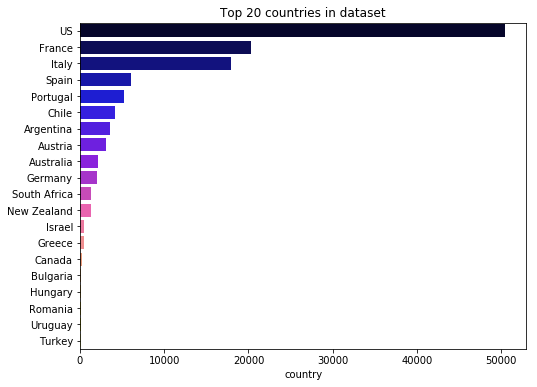

In [57]:
plt.figure(figsize=(8,6))
count = df['country'].value_counts().to_frame()[0:20]
sns.barplot(x= count['country'], y =count.index, data=count, palette='gnuplot2')
plt.title('Top 20 countries in dataset');

In [76]:
# Group by country, get mean of points for each country
# Odd that England and India have the highest rated wine... something seems off there.
gb_country = df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()
gb_country.head()

,points
country,
England,91.746032
India,90.250000
Austria,90.129532
Germany,89.895582
Canada,89.309735


In [61]:
df['points'][df.country == 'England']

4073      90
6700      91
9909      95
22156     91
22369     94
          ..
115312    94
115319    94
115329    94
124898    93
128839    92
Name: points, Length: 63, dtype: int64

## Top varietals

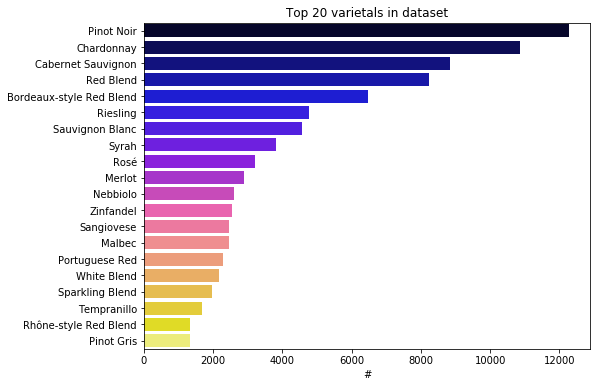

In [63]:
plt.figure(figsize=(8,6))
count = df['variety'].value_counts().to_frame()[0:20]
sns.barplot(x= count['variety'], y =count.index, data=count, palette='gnuplot2')
plt.xlabel('#')
plt.title('Top 20 varietals in dataset');

In [65]:
gb_variety_price = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
gb_variety_price

,price
variety,
Bordeaux-style Red Blend,3300.0
Pinot Noir,2500.0
Chardonnay,2013.0
Grüner Veltliner,1100.0
Bordeaux-style White Blend,1000.0
Port,1000.0
Sangiovese Grosso,900.0
Shiraz,850.0
Rosé,800.0


# Final cleaning

In [66]:
df.isna().sum()

country           59
description        0
designation    34545
points             0
price           8395
province          59
region_1       19560
region_2       73219
taster_name    24917
title              0
variety            1
winery             0
vintage            0
log_price       8395
dtype: int64

In [67]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'title', 'variety', 'winery',
       'vintage', 'log_price'],
      dtype='object')

## Replace NaNs in some cols with '999' so that when we add to stop word list it's not a bunch of NaNs but rather one '999', which will get removed

In [68]:
winery_list = set(df.winery.to_list())
varietal_list = set(df.variety.to_list())
region1_list = set(df.region_1.to_list())
region2_list = set(df.region_2.to_list())
designation_list = set(df.designation.to_list())


In [69]:
df[['winery', 'variety', 'region_1', 'region_2', 'designation']]=\
df[['winery', 'variety', 'region_1', 'region_2', 'designation']].fillna(value=999)

# Pickle

In [72]:
df.isna().sum()

country           59
description        0
designation        0
points             0
price           8395
province          59
region_1           0
region_2           0
taster_name    24917
title              0
variety            0
winery             0
vintage            0
log_price       8395
dtype: int64

In [73]:
import pickle
with open ('df_cleaned.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)

In [57]:
# # To load pickle back in
# with open('df_cleaned.pickle','rb') as read_file:
#     df = pickle.load(read_file)